In [1]:
from PIL import Image
import argparse
import sys

import gym
import numpy as np
import pyglet

from gym_duckietown.envs import DuckietownEnv
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.4.3 path /Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages
DEBUG:aido_schemas:aido-protocols version 6.1.1 path /Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages
DEBUG:nodes:version 6.2.17 path /Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages pyparsing 3.0.9
DEBUG:gym-duckietown:gym-duckietown version 6.1.34 path /Users/oliverchang/Documents/gym-duckietown/src



{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True}


In [161]:
env = DuckietownEnv(
        seed=47,
        map_name="straight_road",
        draw_curve=False,
        draw_bbox=False,
        domain_rand=False,
        frame_skip=1,
        distortion=False,
        camera_rand=False,
        dynamics_rand=False,
);

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.11
    information: {vendor: Apple, renderer: Apple M2, version: 2.1 Metal - 83, shading-language-version: 1.20}
  nvidia_around: False


DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:loading map file "/Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages/duckietown_world/data/gd1/maps/straight_road.yaml"
INFO:gym-duckietown:done
INFO:gym-duckietown:Starting at [0.30515366 0.         0.36814663] 3.1950709068321608
INFO:gym-duckietown:using DuckietownEnv
/Users/oliverchang/opt/anaconda3/envs/drones/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


INFO:gym-duckietown:Starting at [0.13953127 0.         0.23750333] 3.2544816710531506


(480, 640, 3)


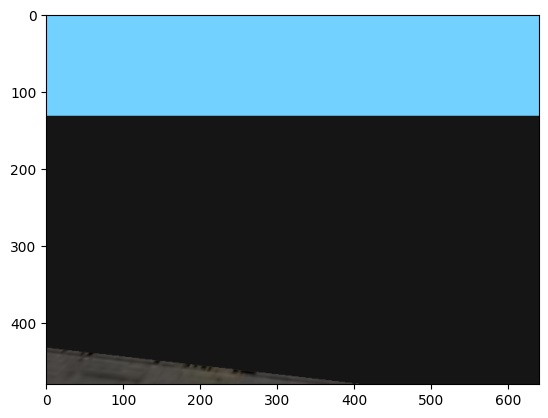

In [168]:
ob = env.reset()
print(ob.shape)
plt.imshow(ob)
plt.show()

(600, 800, 3)


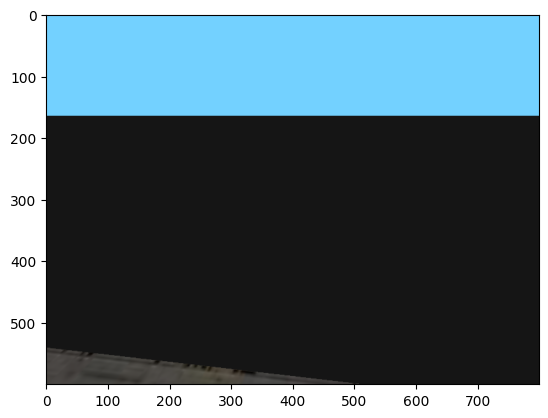

In [171]:
ob = env.render(mode="rgb_array")
print(ob.shape)
plt.imshow(ob)
plt.show()

Why does the rgb array from env.render() have different dimensions than the one from reset()?

# REINFORCE

In [172]:
lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
lane_pose

LanePosition(dist=-0.0620033348952142, dot_dir=0.9936347989840718, angle_deg=-6.468064254029011, angle_rad=-0.11288901746335715)

DEBUG:gym-duckietown:No tile found at [0.16009886 0.         0.6063557 ] (0, 1)
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [0.25455603 0.         0.5821877 ]
DEBUG:gym-duckietown:l_pos: [0.16009886 0.         0.6063557 ]
DEBUG:gym-duckietown:r_pos: [0.3490132  0.         0.55801969]
DEBUG:gym-duckietown:f_pos: [0.22555442 0.         0.46883909]
INFO:gym-duckietown:Starting at [0.50504835 0.         0.38615107] 0.12728148811063464


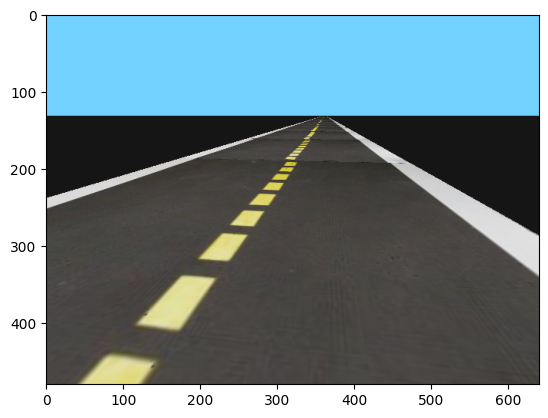

In [208]:
ob = env.reset()
plt.imshow(ob)

[-79.61917  44.17475]
0.7424706987889704


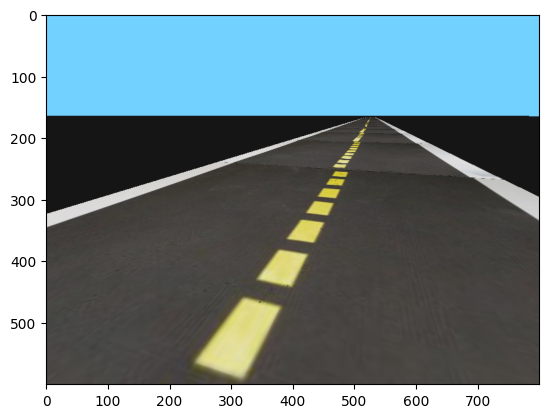

In [273]:
sample_action = env.action_space.sample()*-100
print(sample_action)
ob, reward, done, info = env.step(sample_action)
print(reward)
ob = env.render(mode="rgb_array")
plt.imshow(ob)
plt.show()

In [243]:
ob.shape, reward, done, info

((600, 800, 3),
 0.890821025592894,
 False,
 {'Simulator': {'action': [1.0, 1.0], 'msg': ''},
  'DuckietownEnv': {'k': 27.0,
   'gain': 1.0,
   'train': 0.0,
   'radius': 0.0318,
   'omega_r': 161.58736336906,
   'omega_l': 179.88490248626132}})